In [1]:
import pandas as pd

# replace with your path
path = '/Users/brunobarbieri/Library/CloudStorage/OneDrive-UniversityofPisa/TA_Project/data/'
df = pd.read_csv(path + 'en_lyrics.csv')

In [7]:
df = df.drop(
    columns= [
        'id',
        'language_cld3', 'language_ft', 'language'
    ]
)

In [8]:
df

,title,tag,artist,year,views,features,lyrics
0,Killa Cam,rap,Cam'ron,2004,173166,"{""Cam\\'ron"",""Opera Steve""}","[Chorus: Opera Steve & Cam'ron]\nKilla Cam, Ki..."
1,Can I Live,rap,JAY-Z,1996,468624,{},"[Produced by Irv Gotti]\n\n[Intro]\nYeah, hah,..."
2,Forgive Me Father,rap,Fabolous,2003,4743,{},Maybe cause I'm eatin\nAnd these bastards fien...
3,Down and Out,rap,Cam'ron,2004,144404,"{""Cam\\'ron"",""Kanye West"",""Syleena Johnson""}",[Produced by Kanye West and Brian Miller]\n\n[...
4,Fly In,rap,Lil Wayne,2005,78271,{},"[Intro]\nSo they ask me\n""Young boy\nWhat you ..."
...,...,...,...,...,...,...,...
3374193,Everything Is Alright Now,pop,Chuck Bernard,2013,2,{},"Everything is alright now\nOh yes, baby\nEvery..."
3374194,White Lies,pop,ElementD,2019,1,"{""Harley Bird""}",[Verse 1]\nHalf truth and half you\nDidn't we ...
3374195,Ocean,pop,Effemar,2022,3,{},[Verse 1]\nDance for me now\nKeeping yourself ...
3374196,Raise Our Hands,pop,"Culture Code, Pag & Mylo",2016,3,"{Elex,""Culture Code / Pag & Mylo""}",[Verse 1]\nHere our purpose feels alive\nWe ar...


/var/folders/68/gjrvx3m51494g9gp2r93j3vh0000gn/T/ipykernel_10302/2999199767.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(pd.cut(df['views'], bins=bins, right= True)).count()['title'].plot(kind= 'bar')


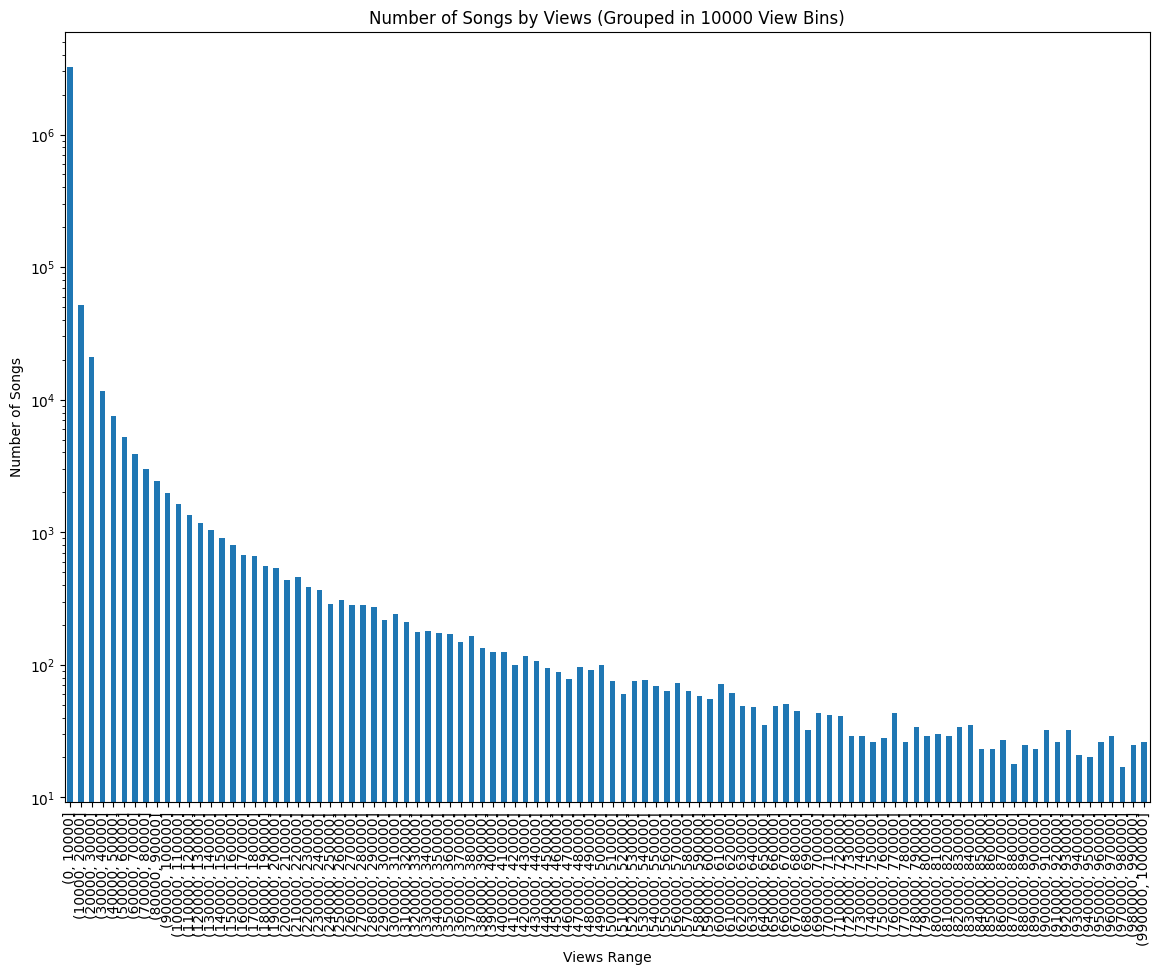

In [14]:
import matplotlib.pyplot as plt


bins = list(range(0, 1000000, 10000)) + [1000000]

plt.figure(figsize=(14, 10))

# Group by the bins and count the number of entries in each bin
df.groupby(pd.cut(df['views'], bins=bins, right= True)).count()['title'].plot(kind= 'bar')

plt.title('Number of Songs by Views (Grouped in 10000 View Bins)')
plt.xlabel('Views Range')
plt.ylabel('Number of Songs')

plt.xticks(rotation= 90)
plt.yscale('log')
plt.show()

In [ ]:
# 370714 rows do not contain \n\n
# 342434 rows do not contain \n\n and have tag != 'misc'
# 283416 rows do not contain \n\n or [<something>], with tag != 'misc'
df[~(df['lyrics'].str.contains(r'\n\n', na=False)) &
   ~(df['lyrics'].str.contains(r'\[.*\]', na=False)) &
   (df['tag'] != 'misc')
]

,title,tag,artist,year,views,features,lyrics,id,language_cld3,language_ft,language
160,Dreams,rap,Domo Genesis,2010,1674,{},Now if I see it in my dreams\nIs it for real? ...,6354,en,en,en
262,You Dont Know,rap,Jean Grae,2003,3645,{},"Black people raise up, anger management cases ...",306,en,en,en
434,Talk About A Girl,rap,Charizma & Peanut Butter Wolf,2003,1321,{},"Errr why what happened?\nOh okay\nOkay okay, I...",13549,en,en,en
607,Gully TV DVD Freestyle,rap,Loaded Lux,2008,8854,{},"I been rocking since the cradle\nBarfight, my ...",1038,en,en,en
701,Ugly Freestyle,rap,Skillz,2010,1158,{},"I ain't choose too rhyme, y'all betta get it r...",678,en,en,en
...,...,...,...,...,...,...,...,...,...,...,...
3374003,Drain my blood,rap,Cholorofilm,2022,4,{},Lets just say\nIm not ok\nLove u betrayed\nGoi...,7882136,en,en,en
3374065,SW33T MUSiC,pop,Warmth,2021,2,{},Music\nSweet Music\nUse it (To heal)\nDon't ab...,7882301,en,en,en
3374079,Outlaw,rap,Jaime,2022,16,{},Kill shot\nKillshot\nKillshot\nKillshot aim\nN...,7882330,en,en,en
3374164,BMW Love,rap,Nic Steez,2020,2,{},Maybe I need some rest\nMaybe I need a break\n...,7882702,en,en,en


In [ ]:
# tag
# country      86658
# misc        140977
# pop        1393536
# rap         964538
# rb          155075
# rock        633287
df.groupby('tag').count()['title']

tag
country      86658
misc        140977
pop        1393536
rap         964538
rb          155075
rock        633287
Name: title, dtype: int64

In [ ]:
# check for featurings contained in artist rather than feat
# e.g: Charizma & Peanut Butter Wolf

In [ ]:
# split stanzas, take into account chorus/verse number
def split_into_stanzas(row):
    stanzas = row['lyrics'].split('\n\n')  # Split by double newlines
    stanza_entries = []
    for stanza in stanzas:
        stanza_entry = row.to_dict()  # Convert all metadata to a dictionary
        stanza_entry['stanza'] = stanza.strip()  # Add the stanza
        stanza_entries.append(stanza_entry)
    return stanza_entries

# Transform the dataframe
stanza_data = []
for _, row in df.iterrows():
    stanza_data.extend(split_into_stanzas(row))  # Extend with stanza dictionaries

# Create a new dataframe with stanzas
stanza_df = pd.DataFrame(stanza_data)

# Drop the original 'lyrics' column (optional)
stanza_df = stanza_df.drop(columns=['lyrics'])

In [ ]:
# for encoding, sentence_transformers.SentenceTransformer
# seems to be the best fit for the task

# simple explanation: this encodes the stanza as a vector
# of real numbers, which can then be passed to models for
# training and classification

# !IMPORTANT: this is the last step of preprocessing
# for both pipelines